# Comparison of different Classification Algorithms



In [92]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

from main import normalize_data
from metrics.githubMetrics import GithubMetrics, metricCollection
from importer.datasetImporter import DatasetImporter

In [93]:
importer = DatasetImporter('data/testset.csv')
X = importer.data
y = importer.target
X = normalize_data(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=142)

X[:5]

,file_count,is_io_page,pdf_count,hw_terminology_files,avg_entropy,png_count,md_count,doc_in_description_or_title,edu_mail_ratio,html_count,open_issue_count,hw_terminology_commits,up_to_dateness,forks_count,watcher_count,avg_folder_depth,doc_terms_in_readme,repo_size,file_folder_ratio
0,0.536623,0.0,0.000000,0.000000,0.615318,0.007761,0.187607,0.0,0.005291,0.000000,0.636914,0.625959,0.000081,0.568115,0.772149,0.261228,0.079104,0.754840,0.358258
1,0.285096,0.0,0.000000,0.000000,0.620799,0.000000,0.230062,0.0,0.000000,0.000000,0.151477,0.000000,0.044560,0.534398,0.752484,0.201503,0.000000,0.369769,0.199491
2,0.599847,0.0,0.302785,0.000000,0.701756,0.112827,0.290305,0.0,0.011194,0.036695,0.000000,0.356850,0.016387,0.000000,0.000000,0.290298,0.222073,0.734431,0.297696
3,0.486599,0.0,0.000000,0.195343,0.602489,0.000000,0.405336,0.0,0.000000,0.000000,0.000000,0.000000,0.008810,0.000000,0.000000,0.813018,0.347449,0.373368,0.229496
4,0.491740,0.0,0.000000,0.000000,0.619508,0.073638,0.217729,0.0,0.024390,0.000000,0.000000,0.087303,0.251916,0.000000,0.000000,0.588705,0.125377,0.508363,0.262975


## Helper

In [94]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [95]:
def analyze_results(model):
    print('acc train:', model.score(X_train, y_train))
    print('acc test:', model.score(X_test, y_test))
    plot_confusion_matrix(confusion_matrix(y_test, model.predict(X_test)), np.unique(y_test))

In [96]:
def null_acc(y):
    return max([len(y[y == x]) for x in np.unique(y)]) / len(y)

In [97]:
print('acc train:', null_acc(y_train))
print('acc test:', null_acc(y_test))

acc train: 0.37
acc test: 0.38513513513513514


## Logistic Regression

In [98]:
logreg = sklearn.linear_model.LogisticRegression(C=1.0, max_iter=100, n_jobs=2)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=2,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

acc train: 0.563333333333
acc test: 0.547297297297
Confusion matrix, without normalization
[[ 6  1  0  0  0  2  0]
 [ 1 47  1  0  1  7  0]
 [ 6  5  2  0  0  1  1]
 [ 6 11  0  1  1  3  0]
 [ 1  6  0  0  1  7  0]
 [ 1  1  0  0  0 24  0]
 [ 0  4  0  0  0  0  0]]


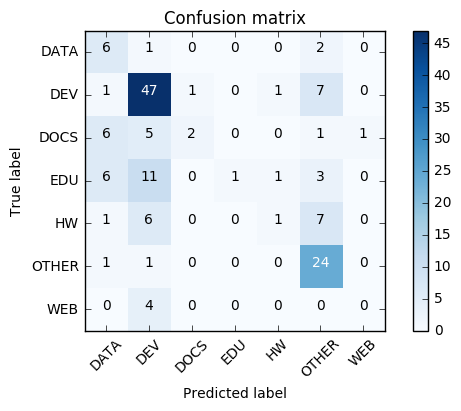

In [99]:
analyze_results(logreg)

## SVM

In [100]:
svm = sklearn.svm.SVC(C=20.0, random_state=1337)
svm.fit(X_train, y_train)

SVC(C=20.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1337, shrinking=True,
  tol=0.001, verbose=False)

acc train: 0.616666666667
acc test: 0.554054054054
Confusion matrix, without normalization
[[ 6  0  0  0  0  3  0]
 [ 2 42  1  1  2  9  0]
 [ 4  5  5  0  1  0  0]
 [ 7  6  0  3  2  4  0]
 [ 0  5  1  0  2  7  0]
 [ 1  1  0  0  0 24  0]
 [ 0  4  0  0  0  0  0]]


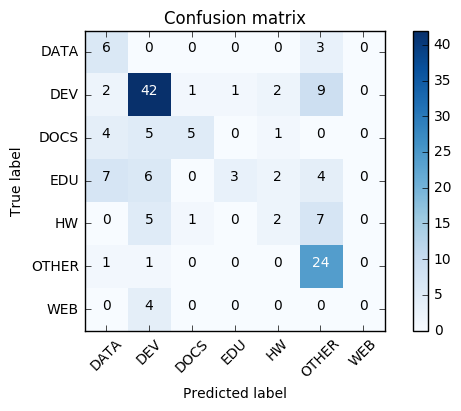

In [101]:
analyze_results(svm)

## DecisionTree

In [102]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1337)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1337, splitter='best')

acc train: 0.996666666667
acc test: 0.513513513514
Confusion matrix, without normalization
[[ 6  0  0  0  1  2  0]
 [ 1 38  1  1  4  2 10]
 [ 1  2  6  2  2  1  1]
 [ 4  2  1  5  6  4  0]
 [ 2  2  4  2  2  3  0]
 [ 1  1  2  0  5 17  0]
 [ 1  1  0  0  0  0  2]]


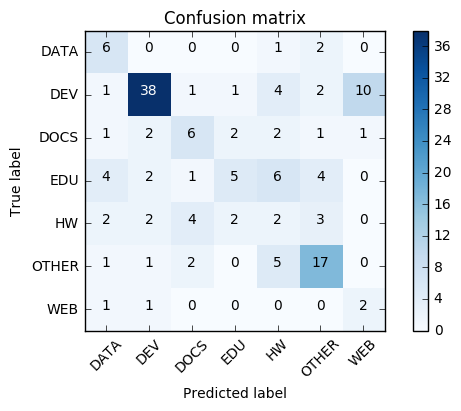

In [103]:
analyze_results(dtc)

## Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1337)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=1337,
            verbose=0, warm_start=False)

acc train: 0.996666666667
acc test: 0.614864864865
Confusion matrix, without normalization
[[ 8  0  0  0  0  1  0]
 [ 1 48  1  1  0  4  2]
 [ 6  6  2  0  0  0  1]
 [ 4  6  1  5  3  3  0]
 [ 0  3  2  1  5  4  0]
 [ 1  1  1  0  0 23  0]
 [ 0  4  0  0  0  0  0]]


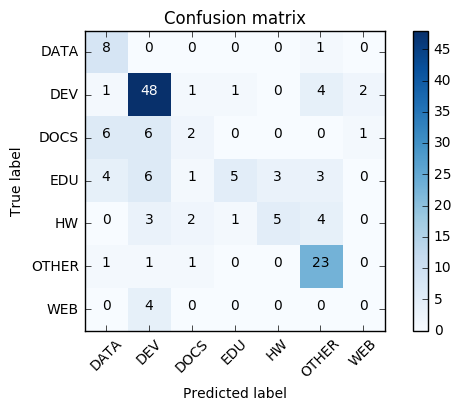

In [105]:
analyze_results(rf)

## NN

In [106]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=2000, hidden_layer_sizes=(100,), random_state=1337)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1337,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

acc train: 0.81
acc test: 0.594594594595
Confusion matrix, without normalization
[[ 7  0  0  0  1  1  0]
 [ 2 41  3  0  4  4  3]
 [ 3  2  7  0  1  2  0]
 [ 5  1  1  6  6  3  0]
 [ 0  3  2  1  6  3  0]
 [ 2  1  0  0  3 20  0]
 [ 0  3  0  0  0  0  1]]


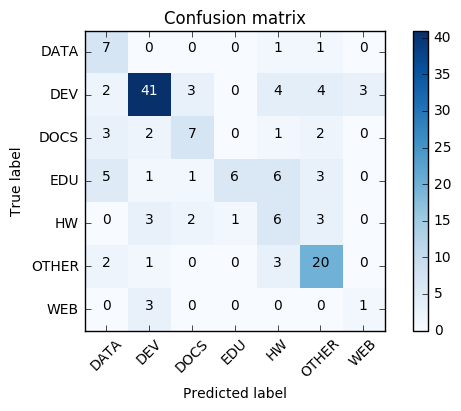

In [107]:
analyze_results(mlp)

## Two Step Stuff

In [108]:
from customClassifier.TwoStepClassifier import TwoStepClassifier
tsc = TwoStepClassifier(
    sklearn.neural_network.MLPClassifier(max_iter=20000, hidden_layer_sizes=(50,20), random_state=1337, shuffle=False, learning_rate='adaptive'),
    RandomForestClassifier(n_estimators=100, random_state=1337)
)
tsc.fit(X_train, y_train)

acc train: 0.903333333333
acc test: 0.533783783784
Confusion matrix, without normalization
[[ 8  0  0  0  0  1  0]
 [ 4 31  2  3  8  4  5]
 [ 3  2  5  0  3  0  2]
 [ 6  1  1  7  3  3  1]
 [ 0  1  3  1  5  4  1]
 [ 1  1  1  0  0 23  0]
 [ 1  3  0  0  0  0  0]]


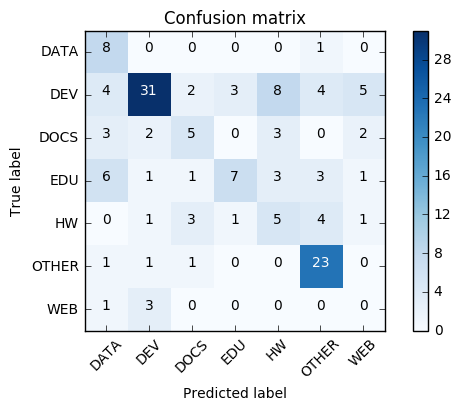

In [109]:
analyze_results(tsc)

# Gradient Boosting

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.15, random_state=1337)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.15, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=1337,
              subsample=1.0, verbose=0, warm_start=False)

acc train: 0.996666666667
acc test: 0.587837837838
Confusion matrix, without normalization
[[ 6  0  0  1  0  2  0]
 [ 2 46  0  0  1  5  3]
 [ 3  4  5  1  0  0  2]
 [ 5  5  1  5  3  3  0]
 [ 0  6  1  1  4  3  0]
 [ 1  2  0  0  3 20  0]
 [ 1  2  0  0  0  0  1]]


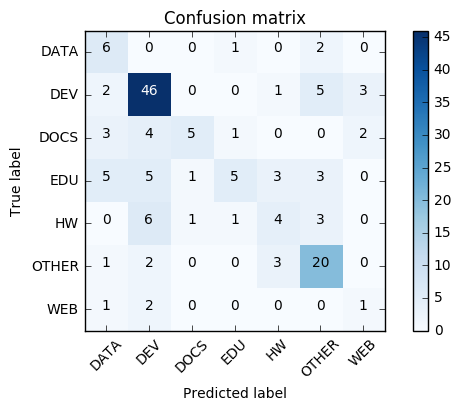

In [111]:
analyze_results(gbc)

## Voting Classifier

In [115]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier([('svc', SVC(C=20.0, random_state=1337)),
                      ('rf', RandomForestClassifier(n_estimators=100, random_state=1337)),
                      ('mlp', MLPClassifier(max_iter=20000, hidden_layer_sizes=(50, 20), random_state=1337, shuffle=False,
                                    learning_rate='adaptive')),
                      ('mlp2', MLPClassifier(max_iter=20000, hidden_layer_sizes=(100,), random_state=1337, shuffle=False, learning_rate='adaptive')),
                      ('gb', GradientBoostingClassifier(learning_rate=0.15, random_state=1337)),
                      ], n_jobs=1)
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('svc', SVC(C=20.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1337, shrinking=True,
  tol=0.001, verbose=False)), ('rf', RandomForestClassifier(bootstrap=True, class_w...=100, presort='auto', random_state=1337,
              subsample=1.0, verbose=0, warm_start=False))],
         n_jobs=1, voting='hard', weights=None)

acc train: 0.853333333333
acc test: 0.614864864865
Confusion matrix, without normalization
[[ 7  0  0  0  1  1  0]
 [ 1 47  1  0  2  5  1]
 [ 2  4  7  0  0  2  0]
 [ 7  3  1  4  4  3  0]
 [ 0  5  1  0  5  4  0]
 [ 1  1  0  0  3 21  0]
 [ 0  4  0  0  0  0  0]]


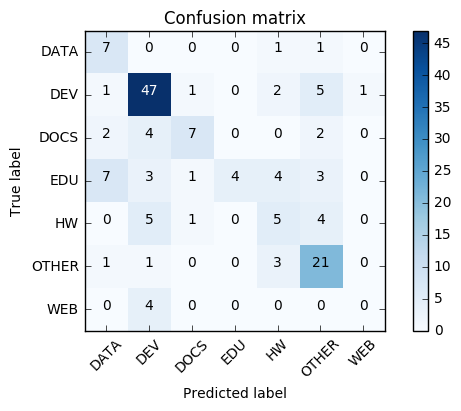

In [116]:
analyze_results(vc)

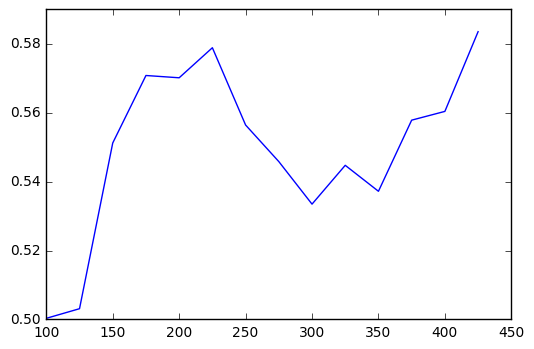

In [119]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm = SVC(C=20.0, random_state=None)
accuracies = []
datasizes = []
for datasize in range(100, len(X), 25):
    datasizes.append(datasize)
    accuracies.append(cross_val_score(svm, X[:datasize], y[:datasize]).mean())

plt.plot(datasizes, accuracies)